# Librerias

In [67]:
import pandas as pd
import numpy as np

In [68]:
# Cargar informacion

url = "/content/concreto.csv"
df = pd.read_csv(url)
df.head(5)

,cemento,escoria,ceniza_volatil,agua,super_plastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [69]:
# Consulta de valores nulos

missing_val_count_by_column = df.isnull().sum()
missing_val_count_by_column

cemento                   0
escoria                   0
ceniza_volatil            0
agua                      0
super_plastificante       0
agregado_grueso           0
agregado_fino             0
edad                      0
resistencia_compresion    0
dtype: int64

In [70]:
df.columns

Index(['cemento', 'escoria', 'ceniza_volatil', 'agua', 'super_plastificante',
       'agregado_grueso', 'agregado_fino', 'edad', 'resistencia_compresion'],
      dtype='object')

In [71]:
features = ['cemento', 'escoria', 'ceniza_volatil', 'agua', 'super_plastificante',
       'agregado_grueso', 'agregado_fino', 'edad']
X = df[features]
Y = df['resistencia_compresion']

In [72]:
type(X)

pandas.core.frame.DataFrame

In [73]:
X_tensor = tf.convert_to_tensor(X)
Y_tensor = tf.convert_to_tensor(Y)

# Red Neuronal

In [74]:
import tensorflow as tf

# Definicion Capas ocultas
# units es la cantidad de neuronas
# input_shape es la cantidad de entradas a la neurona

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[8])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error')



In [75]:
print("Comenzando entrenamiento...")
historial = modelo.fit(X_tensor, Y_tensor, epochs=100, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/100
33/33 [==============================] - 1s 2ms/step - loss: 33491.7891
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 345.2735
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 157.6276
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 121.0385
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 122.3913
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 118.1912
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 127.4379
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 118.8031
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 129.8173
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 144.0940
Epoch 11/100
33/33 [==============================] - 0s 2ms/step - loss: 132.2894
Epoch 12/100
33/33 [==============================] - 0s 2ms/step 

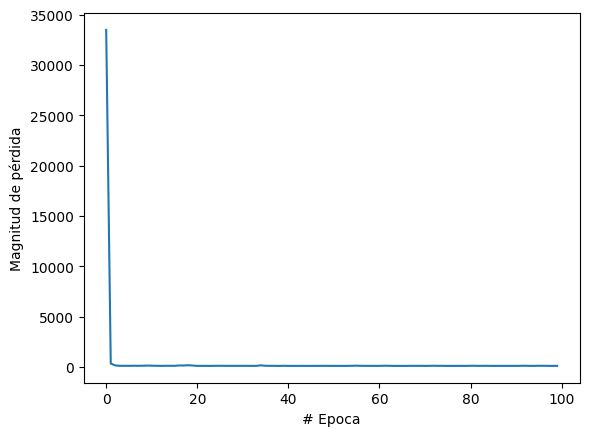

In [76]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [90]:
pred_1 = X.iloc[0].values
type(pred_1)
pred_2 = list(pred_1)
pred_2

[540.0, 0.0, 0.0, 162.0, 2.5, 1040.0, 676.0, 28.0]

In [78]:
pred_1_tensor = tf.convert_to_tensor(pred_1)

In [91]:
print("Hagamos una predicción!")
resultado = modelo.predict(pred_2)
# print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!


ValueError: ignored